## 이미지 처리 딥러닝
# 이미지 처리와 필터링

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 이미지 불러오기

In [14]:
bob = plt.imread('bob_dylan.jpg')

In [4]:
type(bob), bob.shape, bob.dtype, bob.max(), bob.min()

(numpy.ndarray, (355, 355, 3), dtype('uint8'), 255, 0)

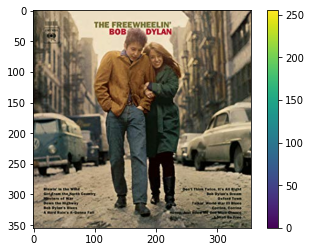

In [5]:
plt.imshow(bob)
plt.colorbar()

- 채널이 4개인 이미지도 있다 (4번째 채널은 투명도인 알파채널)

In [6]:
lucy = plt.imread('lucy.png')

In [7]:
type(lucy), lucy.shape, lucy.dtype, lucy.max(), lucy.min()

(numpy.ndarray, (186, 199, 4), dtype('float32'), 1.0, 0.0)

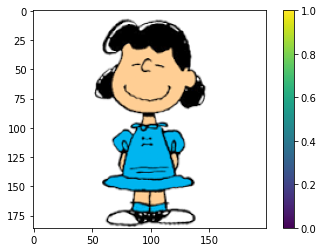

In [8]:
plt.imshow(lucy)
plt.colorbar()

In [10]:
lucy[:,:,3].min()

1.0

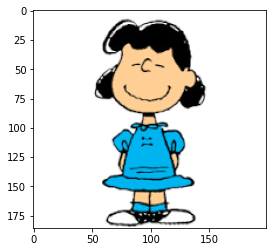

In [11]:
plt.imshow(lucy[:,:,:3])

### 이미지는 숫자
- 0~255 까지의 정수로 표현 (np.uint8)
- 0.0 ~ 1.0 까지의 실수로 표현 (np.float)

In [12]:
bob[100:110, 100:110, 0]

array([[170, 156, 170, 199, 197, 164, 161, 171, 172, 169],
       [173, 155, 170, 197, 175, 151, 161, 168, 173, 165],
       [179, 157, 171, 194, 162, 149, 168, 167, 175, 166],
       [183, 158, 171, 191, 158, 154, 177, 169, 179, 170],
       [171, 170, 175, 168, 160, 173, 177, 170, 173, 183],
       [169, 166, 173, 167, 168, 167, 168, 175, 181, 177],
       [165, 162, 168, 167, 163, 159, 166, 184, 184, 161],
       [163, 158, 163, 166, 162, 167, 179, 186, 166, 133],
       [163, 156, 160, 168, 180, 187, 185, 167, 137, 114],
       [166, 159, 160, 169, 188, 186, 168, 142, 128, 131]], dtype=uint8)

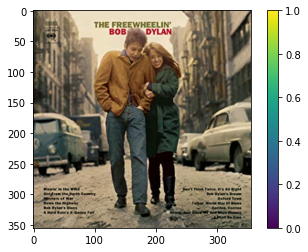

In [15]:
bob2 = bob/255

plt.imshow(bob2)
plt.colorbar()

### 이미지 히스토그램
- 밝기 영역별 픽셀수 표현

(array([5551., 1567., 1299., 1262., 1171.,  940.,  997., 1047.,  965.,
         990., 1166., 1282., 1641., 1246., 1155.,  999., 1027., 1095.,
        1171., 1142., 1326., 1166., 1065., 1132., 1093., 1162., 1188.,
        1156., 1230., 1288., 1425., 1278., 1309., 1463., 1535., 1671.,
        1644., 1712., 1782., 1867., 1848., 1948., 2096., 2075., 2139.,
        2265., 2240., 2263., 2411., 2488., 2476., 2490., 2476., 2580.,
        2592., 2532., 2585., 2669., 2712., 2866., 2642., 2693., 2709.,
        2552., 2617., 2645., 2502., 2422., 2426., 2514., 2382., 2444.,
        2521., 2406., 2400., 2429., 2282., 2330., 2330., 2232., 2227.,
        2245., 2303., 2203., 2149., 2218., 2123., 2114., 2059., 2105.,
        2108., 2080., 1964., 2049., 2060., 2020., 2007., 1968., 2069.,
        1952., 1960., 1965., 1962., 1957., 1921., 2009., 2064., 1989.,
        2033., 2118., 2082., 2006., 1976., 2015., 2010., 2043., 2004.,
        2007., 1930., 2044., 1961., 1937., 1978., 1977., 1968., 2018.,
      

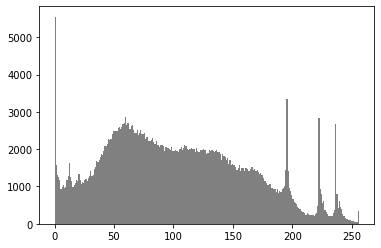

In [17]:
plt.hist(bob.ravel(), bins=range(257), color='gray')

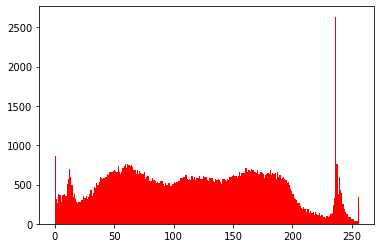

In [18]:
plt.hist(bob[:,:,0].ravel(), bins=range(257), color='red') # R channel
pass

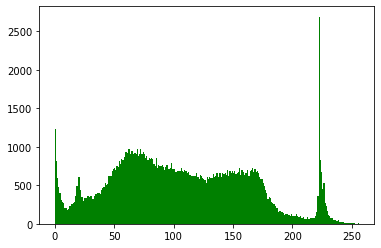

In [19]:
plt.hist(bob[:,:,1].ravel(), bins=range(257), color='green') # G channel
pass

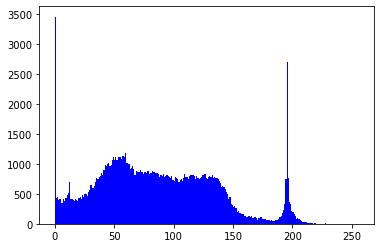

In [20]:
plt.hist(bob[:,:,2].ravel(), bins=range(257), color='blue') # B channel
pass

### 채널 분리

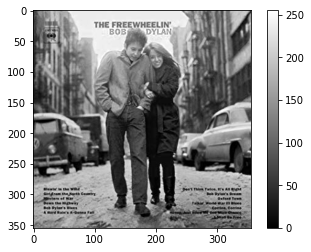

In [23]:
plt.imshow(bob[:,:,0], cmap='gray', vmin=0, vmax=255) # R
plt.colorbar()

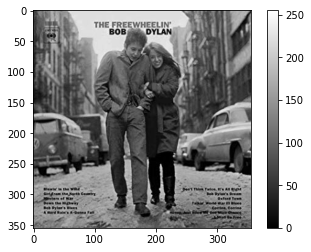

In [24]:
plt.imshow(bob[:,:,1], cmap='gray', vmin=0, vmax=255) # G
plt.colorbar()

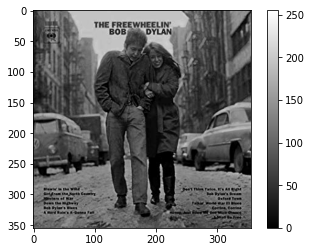

In [25]:
plt.imshow(bob[:,:,2], cmap='gray', vmin=0, vmax=255) # B
plt.colorbar()

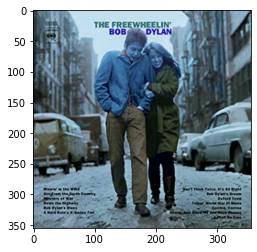

In [26]:
plt.imshow(bob[:,:,[2,1,0]]) # RGB => BGR

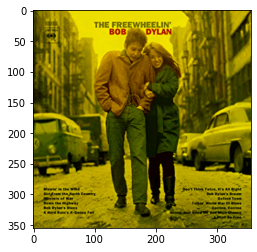

In [27]:
bob2 = bob.copy()
bob2[:,:,2] = 0 # B channel

plt.imshow(bob2)

### 잘라내기

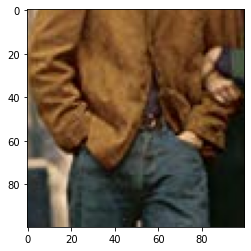

In [29]:
cut = bob[100:200, 100:200]
plt.imshow(cut)

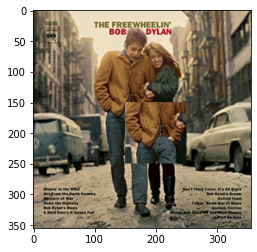

In [30]:
bob2 = bob.copy()
bob2[150:250, 150:250] = cut

plt.imshow(bob2)

### 이미지 저장

In [31]:
plt.imsave('bob2.jpg', bob2)

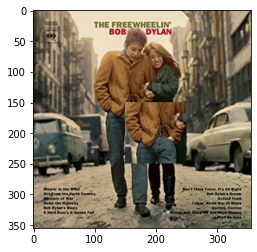

In [34]:
plt.imshow(plt.imread('bob2.jpg'))

### 흑백이미지로 변환

In [35]:
bob2 = bob.mean(axis=2)
bob2.dtype, bob2.max(), bob2.min()

(dtype('float64'), 245.33333333333334, 0.0)

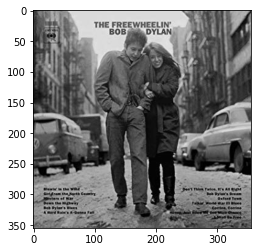

In [37]:
bob2 = bob.mean(axis=2)/255
plt.imshow(bob2, cmap='gray', vmin=0, vmax=1)

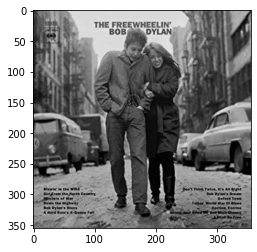

In [38]:
bob2 = bob.mean(axis=2).astype(np.uint8)
plt.imshow(bob2, cmap='gray', vmin=0, vmax=255)

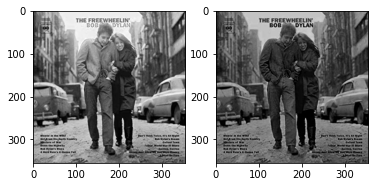

In [40]:
plt.subplot(1,2,1)
bob2 = bob.max(axis=2)
plt.imshow(bob2, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
bob2 = bob.min(axis=2)
plt.imshow(bob2, cmap='gray', vmin=0, vmax=255)

### 필터링

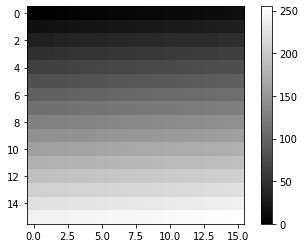

In [47]:
img = np.arange(256).reshape(16,16)
plt.imshow(img, cmap='gray')
plt.colorbar()

In [48]:
filter = np.eye(16)
filter

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

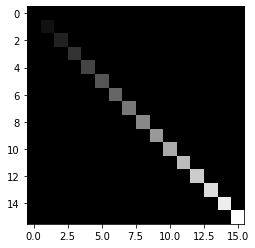

In [49]:
img2 = img*filter
plt.imshow(img2, cmap='gray')

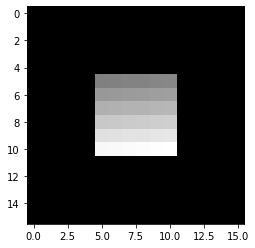

In [50]:
filter = np.zeros([16,16])
filter[5:11, 5:11] = 1

plt.imshow(img*filter, cmap='gray')

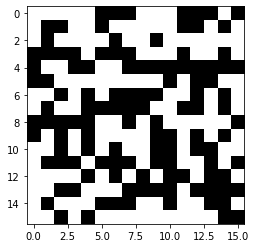

In [51]:
filter = np.random.randint(2, size=[16,16])
plt.imshow(filter, cmap='gray')

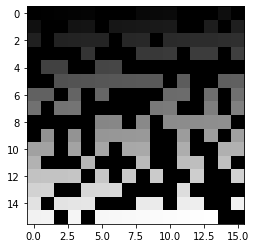

In [53]:
img2 = img*filter
plt.imshow(img2, cmap='gray')

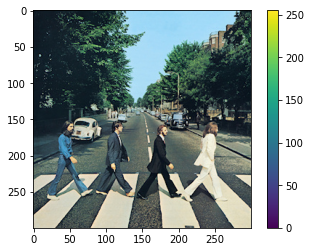

In [44]:
abbey = plt.imread('abbey_road.jpg')

plt.imshow(abbey)
plt.colorbar()

In [42]:
abbey.shape, abbey.dtype, abbey.max(), abbey.min()

((300, 300, 3), dtype('uint8'), 255, 0)

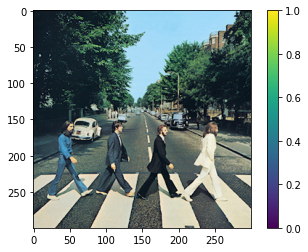

In [45]:
abbey = abbey/255 # 실수로 변환 (0~1)
plt.imshow(abbey)
plt.colorbar()

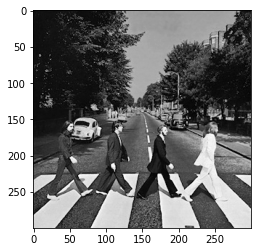

In [54]:
img = abbey[:,:,0] # R channel 분리
plt.imshow(img, cmap='gray', vmin=0, vmax=1)

### Blur
- X 자 필터 적용

In [55]:
filter = np.array([[1,0,1],[0,1,0],[1,0,1]])/5
filter

array([[0.2, 0. , 0.2],
       [0. , 0.2, 0. ],
       [0.2, 0. , 0.2]])

In [57]:
w, h = img.shape
conv = []

for i in range(h-3+1):
    l = []
    
    for j in range(w-3+1):
        r = (img[i:i+3, j:j+3]*filter).sum()
        l.append(r)
        
    conv.append(l)
    
conv = np.array(conv, dtype=float)

In [61]:
conv.shape, conv.max(), conv.min()

((298, 298), 0.9890196078431372, 0.007058823529411765)

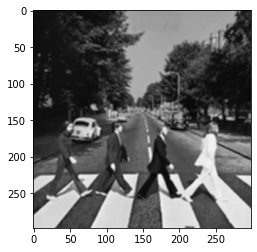

In [59]:
plt.imshow(conv, cmap='gray', vmin=0, vmax=1)

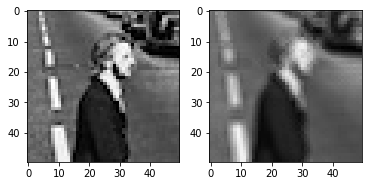

In [60]:
plt.subplot(1,2,1)
plt.imshow(img[150:200, 150:200], cmap='gray', vmin=0, vmax=1)
plt.subplot(1,2,2)
plt.imshow(conv[150:200, 150:200], cmap='gray', vmin=0, vmax=1)

# sharpen
- np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]]) => 외곽선
- np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]]) => 샤프닝

In [62]:
filter = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
filter

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

In [63]:
w, h = img.shape
conv = []

for i in range(h-3+1):
    l = []
    
    for j in range(w-3+1):
        r = (img[i:i+3, j:j+3]*filter).sum()
        l.append(r)
        
    conv.append(l)
    
conv = np.array(conv, dtype=float)

In [64]:
conv.shape, conv.max(), conv.min()

((298, 298), 3.7254901960784306, -5.905882352941177)

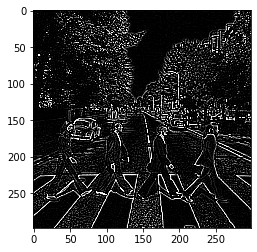

In [65]:
plt.imshow(conv, cmap='gray', vmin=0, vmax=1)

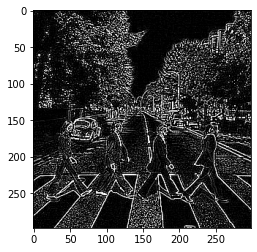

In [66]:
conv2 = conv.copy()
conv2[conv<0] = 0
conv2[conv>1] = 1

plt.imshow(conv2, cmap='gray', vmin=0, vmax=1)

In [67]:
filter = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
filter

array([[-1, -1, -1],
       [-1,  9, -1],
       [-1, -1, -1]])

In [68]:
w, h = img.shape
conv = []

for i in range(h-3+1):
    l = []
    
    for j in range(w-3+1):
        r = (img[i:i+3, j:j+3]*filter).sum()
        l.append(r)
        
    conv.append(l)
    
conv = np.array(conv, dtype=float)

In [69]:
conv.shape, conv.max(), conv.min()

((298, 298), 4.501960784313725, -5.901960784313726)

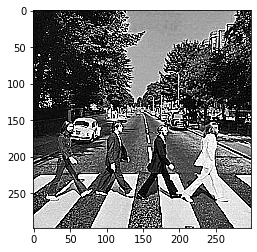

In [70]:
plt.imshow(conv, cmap='gray', vmin=0, vmax=1)

### 기타 효과

In [72]:
filter = np.array([[-2,0,0], [0,1,0], [0,0,2]]) # emboss
filter

array([[-2,  0,  0],
       [ 0,  1,  0],
       [ 0,  0,  2]])

In [73]:
w, h = img.shape
conv = []

for i in range(h-3+1):
    l = []
    
    for j in range(w-3+1):
        r = (img[i:i+3, j:j+3]*filter).sum()
        l.append(r)
        
    conv.append(l)
    
conv = np.array(conv, dtype=float)

In [74]:
conv.shape, conv.max(), conv.min()

((298, 298), 2.9058823529411764, -1.843137254901961)

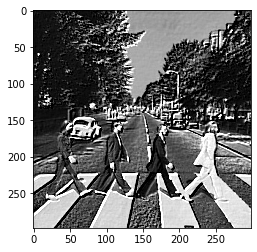

In [75]:
plt.imshow(conv, cmap='gray', vmin=0, vmax=1)

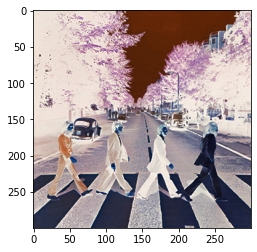

In [77]:
plt.imshow(1-abbey) # 네거티브 필름

### 3차원 필터

In [84]:
X = np.array([[1,0,1],[0,1,0],[1,0,1]])
filter = np.dstack([X, X, X])/15 # 채널을 합친다
filter.shape

(3, 3, 3)

In [86]:
w, h = img.shape
conv = []

for i in range(h-3+1):
    l = []
    
    for j in range(w-3+1):
        r = (img[i:i+3, j:j+3]*filter).sum()
        l.append(r)
        
    conv.append(l)
    
conv = np.array(conv, dtype=float)

In [87]:
conv.shape, conv.max(), conv.min()

((298, 298), 0.9874509803921568, 0.007581699346405228)

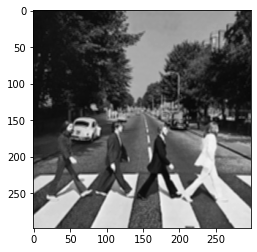

In [88]:
plt.imshow(conv, cmap='gray', vmin=0, vmax=1)

In [89]:
X = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
filter = np.dstack([X, X, X])/15 # 채널을 합친다
filter.shape

(3, 3, 3)

In [91]:
w, h = img.shape
conv = []

for i in range(h-3+1):
    l = []
    
    for j in range(w-3+1):
        r = (img[i:i+3, j:j+3]*filter).sum()
        l.append(r)
        
    conv.append(l)
    
conv = np.array(conv, dtype=float)

In [92]:
conv.shape, conv.max(), conv.min()

((298, 298), 0.5788235294117647, -0.7090196078431371)

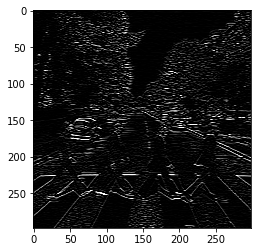

In [95]:
plt.imshow(conv*5, cmap='gray', vmin=0, vmax=1)

### Pooling

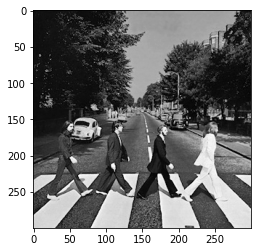

In [96]:
plt.imshow(img, cmap='gray', vmin=0, vmax=1)

In [97]:
img.shape

(300, 300)

In [101]:
# 2x2 격자, Max-pooling
w, h = img.shape
pool = []

for i in range(0,h-1,2):
    l = []
    
    for j in range(0,w-1,2):
        r = img[i:i+2, j:j+2].max()
        l.append(r)
        
    pool.append(l)
    
pool = np.array(pool)

In [102]:
pool.shape

(150, 150)

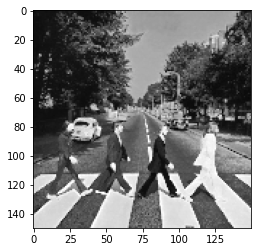

In [104]:
plt.imshow(pool, cmap='gray', vmin=0, vmax=1)

In [105]:
# 3x3 격자, Mean-pooling
w, h = img.shape
pool = []

for i in range(0,h-2,3):
    l = []
    
    for j in range(0,w-2,3):
        r = img[i:i+3, j:j+3].mean()
        l.append(r)
        
    pool.append(l)
    
pool = np.array(pool)

In [106]:
pool.shape

(100, 100)

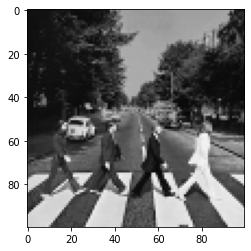

In [107]:
plt.imshow(pool, cmap='gray', vmin=0, vmax=1)

### Convolution(필터) 과 Pooling(사이즈줄이기) 이해하기
- Convolution 을 적용하면 (필터사이즈-1) 만큼 크기가 줄어든다.
- Pooling 을 적용하면 크기가 반으로 줄어든다.
- 필터 사이즈가 3일때, 원본이미지(300X300) => Conv(298X298) => Pool(149X149) => Conv(147X147) => Pool(73X73) => ...
- 300X300 인 이미지에 필터 100개인 Convolution 과 Pooling 을 차례로 적용하면 => 149X149 이미지 100개가 생성된다
> 300X300X3 => 149X149X100
- 이런식으로 변환된 이미지를 신경망과 딥러닝에 적용한다. (원본이미지가 필터와 리사이즈를 통과한 값으로 변환된다.)